In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customizing our chart from `12_Exercise_Trending_Skills.ipynb`

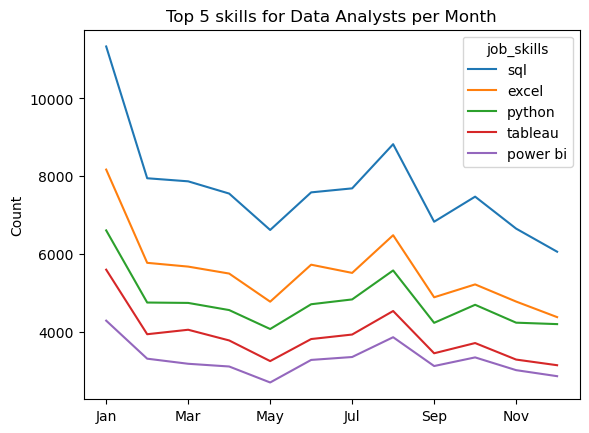

In [7]:
# Getting the number of the month in a column so we can group by that
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Exploding the lists so we can group by skills then pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sorting the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot.drop('Total', inplace=True)

# Use names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

[Cheat Sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png)

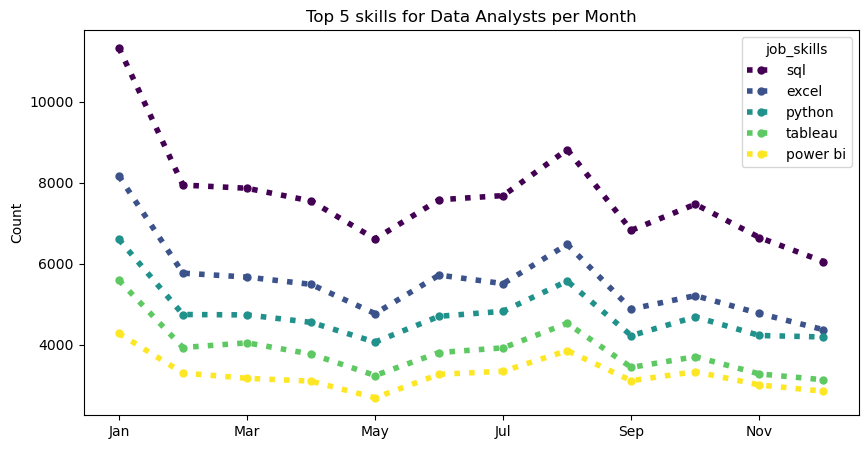

In [8]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # other options: '-', '--', '-.'
    colormap='viridis', # other options on the cheat sheet
    marker='o', # other options: 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10, 5)
)

plt.title('Top 5 skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')

plt.show()

## Customizing our Scatter plot from `15_Scatter_Plots.ipynb`

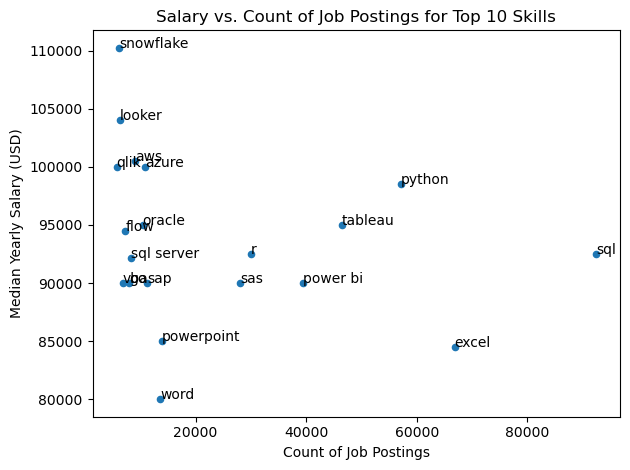

In [9]:
# Explode the 'job_skills' into individual rows
df_DA_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skills_stats = df_DA_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

# Limit to the top skills
skill_count = 20
skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    x = skills_stats['skill_count'].iloc[i]
    y = skills_stats['median_salary'].iloc[i]
    plt.text(x, y, txt)

plt.show()

To prevent overlap and have helping lines pointing at dots when to much text is around them, we will use the adjustText library. [Documentation can be found here](https://adjusttext.readthedocs.io/en/latest/).

If it is not yet installed, it needs to be installed from the terminal, using `conda install adjustText` in the correct environment (python_course in our case).

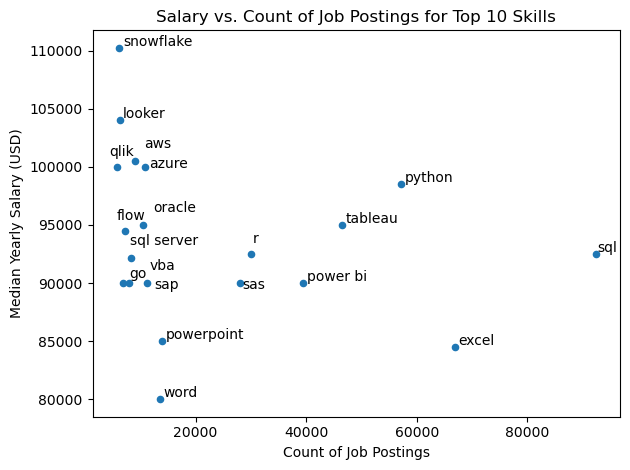

In [10]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Creating an empty list to put the texts into
texts = []

for i, txt in enumerate(skills_stats.index):
    x = skills_stats['skill_count'].iloc[i]
    y = skills_stats['median_salary'].iloc[i]
    # When creating the text labels, we are also appending them to our list
    texts.append(plt.text(x, y, txt))

# Calling the function with the text list as argument
adjust_text(texts)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()

That is already way better, but on the left side it is still not that great, we need lines pointing at the dots from the texts.

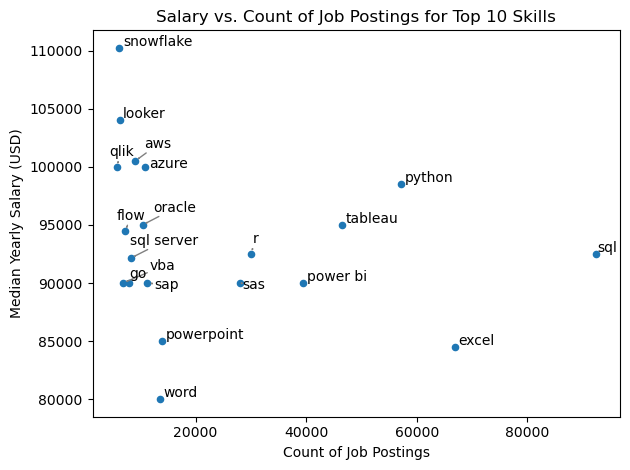

In [11]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Creating an empty list to put the texts into
texts = []

for i, txt in enumerate(skills_stats.index):
    x = skills_stats['skill_count'].iloc[i]
    y = skills_stats['median_salary'].iloc[i]
    # When creating the text labels, we are also appending them to our list
    texts.append(plt.text(x, y, txt))

# Calling the function with the text list as argument
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()

Now we will focus on the y-axis. We don't want those long numbers, we want easy to read money values.

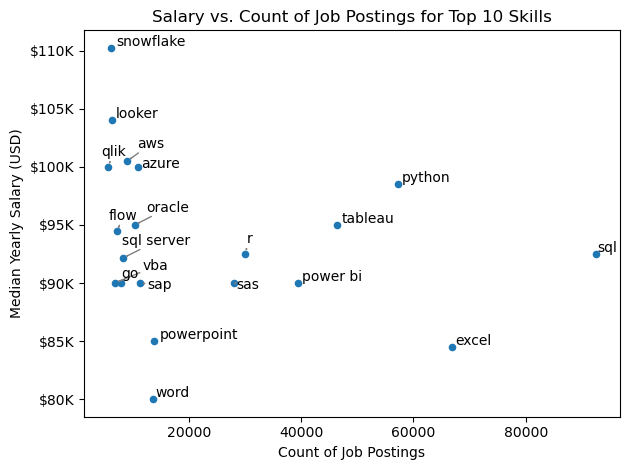

In [16]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skills_stats.index):
    x = skills_stats['skill_count'].iloc[i]
    y = skills_stats['median_salary'].iloc[i]
    texts.append(plt.text(x, y, txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# We need access to the y-axis
# fig, ax = plt.subplots() <-- this is not a bad way
# gca = Get Current Axis - We call this AFTER the plot is generated.
ax = plt.gca()

# This is where we are able to manipulate the major tickmarks on the axis using a function
# that is given to FuncFormatter as a parameter.
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()